In [1]:
using Revise, Plots, FFTW, LinearAlgebra, LaTeXStrings, Random, Distributions

In [2]:
includet("../src/SparseSpikes.jl")
using .SparseSpikes

Define ground truth amplitudes and positions

In [3]:
domain  = [[0, 1], [0, 1]]

2-element Vector{Vector{Int64}}:
 [0, 1]
 [0, 1]

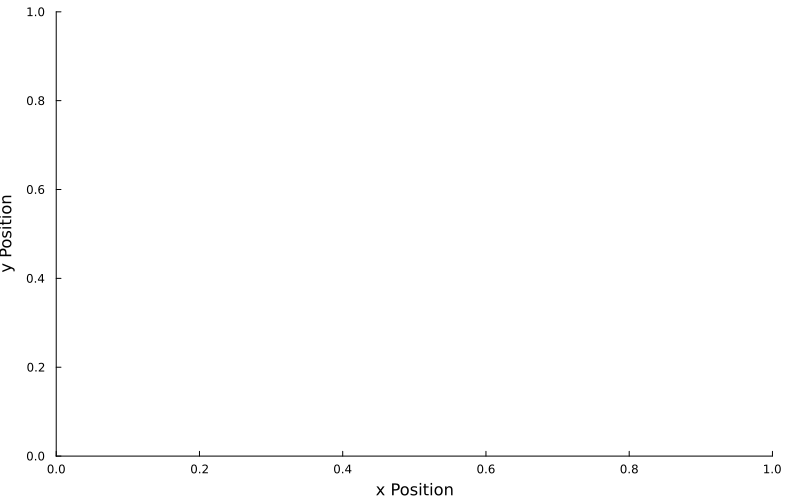

In [4]:
# Define the plot
num_points = 50

plt_grid_x1 = [domain[1][1] + i * (domain[1][2] - domain[1][1]) / num_points for j in 0:num_points, i in 0:num_points]
plt_grid_x2 = [domain[2][1] + j * (domain[2][2] - domain[2][1]) / num_points for j in 0:num_points, i in 0:num_points]

grid = range(0, stop=1, length=(num_points + 1))
plot_size = (400, 250) .* 2
plt = heatmap(xlims=domain[1], ylims=domain[2], xlabel="x Position", ylabel="y Position", color=:viridis, colorbar_title="Amplitude", size=plot_size, grid=false)

In [5]:
ops = gaussian_operators_2D(0.05, plt_grid_x1, plt_grid_x2)

Operators(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 399.99999999999994), 2601), var"#Φ#30"{var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}}(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 399.99999999999994), 2601)), var"#adjΦ#31"{Matrix{Float64}, Matrix{Float64}, var"#adjΦ#27#32"{var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}}}([0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0; … ; 0.0 0.02 … 0.98 1.0; 0.0 0.02 … 0.98 1.0], [0.0 0.0 … 0.0 0.0; 0.02 0.02 … 0.02 0.02; … ; 0.98 0.98 … 0.98 0.98; 1.0 1.0 … 1.0 1.0], var"#adjΦ#27#32"{var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}}(var"#ϕ#29"{var"#gauss2D#28"{Matrix{Float64}, Float64}, Int64}(var"#gauss2D#28"{Matrix{Float64}, Float64}([0.0 0.0; 0.0 0.02; … ; 1.0 0.98; 1.0 1.0], 399.99999999999994), 26

## Spurious spikes for degenerate pre-certificate

In [6]:
function add_noise(y0, noise_level, seed=1)
    Random.seed!(seed)
    sigma = noise_level * norm(y0)
    w = randn(length(y0))
    w = w / norm(w) * sigma
    y = y0 + w
    return y
end

add_noise (generic function with 2 methods)

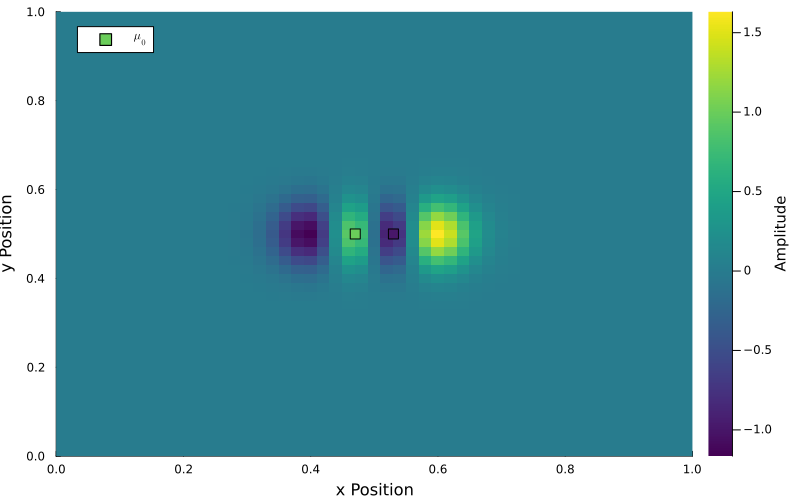

In [7]:
x0 = [[0.47, 0.53], [0.5, 0.5]]
a0 = [1.0, -1.0]

y0 = ops.Φ(x0..., a0)

μ0 = DiscreteMeasure(x0, a0)

ηV = pre_certificate(μ0, ops)

plt_cert = deepcopy(plt)

heatmap!(plt_cert, grid, grid, ηV, color=:viridis)
plot_spikes!(plt_cert, μ0, label=L"μ_0", marker=:square, markersize=5, markerstrokewidth=1)

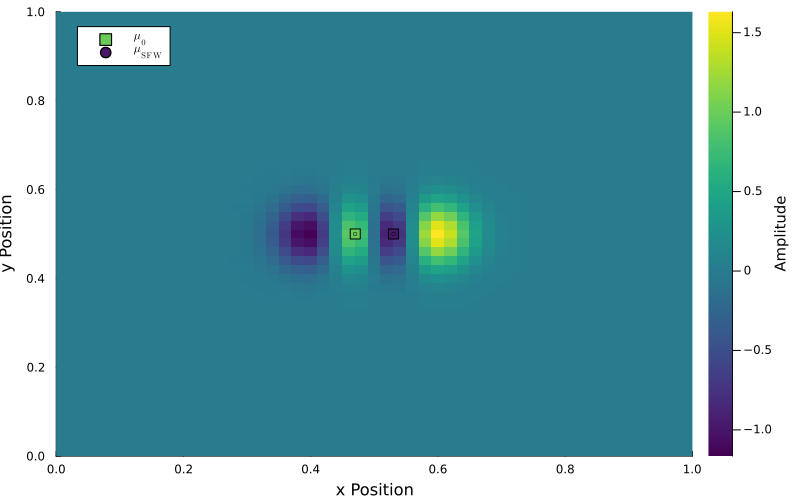

In [17]:
y = add_noise(y0, 0.01)
λ = 0.005

prob = BLASSO(y0, ops, domain, λ)
solve!(prob, :SFW)

plt_spurious = deepcopy(plt_cert)
plot_spikes!(plt_spurious, prob.μ, label=L"μ_\mathrm{SFW}", colorscheme=:viridis, marker=:circle, markersize=2, markerstrokewidth=0.5)

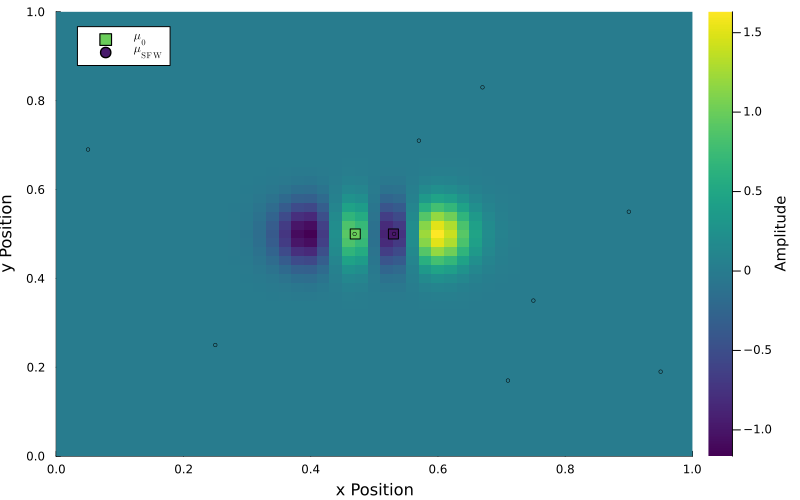

In [28]:
prob.y = add_noise(y0, 0.1)
prob.λ = 0.05
solve!(prob, :SFW)

plt_spurious_ns = deepcopy(plt_cert)
plot_spikes!(plt_spurious_ns, prob.μ, label=L"μ_\mathrm{SFW}", colorscheme=:viridis, marker=:circle, markersize=2, markerstrokewidth=0.5)

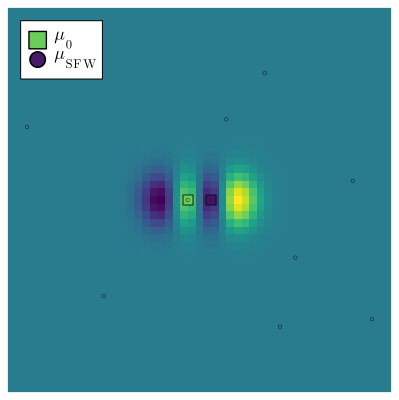

In [26]:
using Plots.Measures
plot!(plt_spurious, xaxis=false, yaxis=false, xlabel="", ylabel="", colorbar=false,
    size=(400, 400), ratio=:equal, ticks=false, legendfontsize=12,
    margins=0mm, right_margin=-4mm,
)
plot!(plt_spurious_ns, xaxis=false, yaxis=false, xlabel="", ylabel="", colorbar=false,
    size=(400, 400), ratio=:equal, ticks=false, legendfontsize=12,
    margins=0mm, right_margin=-4mm,
)

In [27]:
savefig(plt_spurious, "../figures/spurious.svg")
savefig(plt_spurious_ns, "../figures/spurious_ns.svg")

"c:\\Users\\ladis\\OneDrive - University of Warwick\\Year 4\\Super resolution\\Codes\\SparseSpikes\\figures\\spurious_ns.svg"